In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='baac8e0d-59b3-42e6-a703-174ab0540780', project_access_token='p-4950215b3144393990499df25565707c68eda8c5')
pc = project.project_context


ModuleNotFoundError: No module named 'project_lib'

In [7]:
# you acquire the data, where does data reside
import pandas
students_data = pandas.read_csv("https://modcom.co.ke/data2020/datasets/school.csv")
students_data

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,...,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783,3/22/1995,NaN,NaN,NaN,NaN,0.0,0,72.35,NaN,...,88.24,81.50,60.02,81.44,In state,1.0,NaN,NaN,7.0,1.0
1,20278,1/1/1995,NaN,NaN,NaN,Philosophy,0.0,0,70.66,179.20,...,89.45,85.25,70.19,73.27,NaN,1.0,NaN,NaN,5.0,2.0
2,20389,12/31/1994,NaN,NaN,NaN,NaN,0.0,0,70.68,198.52,...,96.73,86.88,71.20,84.24,In state,NaN,NaN,NaN,8.0,7.0
3,22820,12/1/1994,NaN,NaN,NaN,business administration,1.0,0,NaN,198.34,...,74.06,88.68,55.89,73.16,In state,1.0,NaN,NaN,2.0,6.0
4,24559,11/10/1994,NaN,NaN,NaN,NaN,1.0,1,67.43,128.17,...,82.61,77.30,65.52,80.45,Out of state,1.0,NaN,NaN,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,34021,7/18/1987,1-Aug-2011,08-May-2017,4.0,accounting,1.0,0,NaN,NaN,...,87.72,84.99,65.31,NaN,In state,0.0,1.0,18.0,1.0,10.0
431,40697,4/29/1987,1-Aug-2011,09-May-2016,4.0,NaN,0.0,0,68.50,131.92,...,91.01,86.87,70.25,82.67,In state,0.0,3.0,26.0,6.0,15.0
432,34272,NaN,1-Aug-2011,09-May-2016,4.0,nursing,0.0,1,68.10,130.07,...,81.05,85.76,58.16,81.87,NaN,0.0,3.0,29.0,6.0,10.0
433,33628,NaN,1-Aug-2011,08-May-2017,4.0,Nursing,1.0,1,69.27,157.26,...,75.59,85.97,66.84,79.35,In state,0.0,1.0,14.0,4.0,10.0


In [2]:

print(students_data.isnull().sum())

ids               0
bday              8
enrolldate       29
expgradate       29
Rank             29
Major           159
Gender            9
Athlete           0
Height           27
Weight           59
Smoking          24
Sprint           61
MileMinDur       43
English          26
Reading          10
Math             13
Writing          31
State            27
LiveOnCampus     21
HowCommute      188
CommuteTime     188
SleepTime        32
StudyTime        42
dtype: int64


In [7]:
print(subset1.describe())

          English     Reading        Math     Writing   SleepTime
count  409.000000  425.000000  422.000000  404.000000  403.000000
mean    82.787555   82.070800   65.468009   79.521683    5.461538
std      6.839803    7.661778    8.375930    5.511410    2.421994
min     59.830000   55.110000   35.320000   64.060000    0.000000
25%     78.330000   77.190000   60.202500   75.750000    4.000000
50%     83.150000   81.940000   65.445000   79.035000    5.000000
75%     87.170000   87.080000   70.567500   83.687500    7.000000
max    101.950000  103.620000   93.780000   93.010000   13.000000


In [8]:
subset1  = students_data[['English','Reading','Math','Writing','State','SleepTime']]
subset1

,English,Reading,Math,Writing,State,SleepTime
0,88.24,81.50,60.02,81.44,In state,7.0
1,89.45,85.25,70.19,73.27,NaN,5.0
2,96.73,86.88,71.20,84.24,In state,8.0
3,74.06,88.68,55.89,73.16,In state,2.0
4,82.61,77.30,65.52,80.45,Out of state,7.0
...,...,...,...,...,...,...
430,87.72,84.99,65.31,NaN,In state,1.0
431,91.01,86.87,70.25,82.67,In state,6.0
432,81.05,85.76,58.16,81.87,NaN,6.0
433,75.59,85.97,66.84,79.35,In state,4.0


In [8]:
# C: 0   to 1 :   One goes up, the other goes up : Positive
# C: 0   to (-)1 :   One goes up, the other goes down : Negative
#  0   - No correlation
print(subset1.corr())

            English   Reading      Math   Writing  SleepTime
English    1.000000  0.333183  0.243014  0.366806  -0.055363
Reading    0.333183  1.000000  0.519849  0.105491  -0.023526
Math       0.243014  0.519849  1.000000  0.118626   0.033616
Writing    0.366806  0.105491  0.118626  1.000000   0.015838
SleepTime -0.055363 -0.023526  0.033616  0.015838   1.000000


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


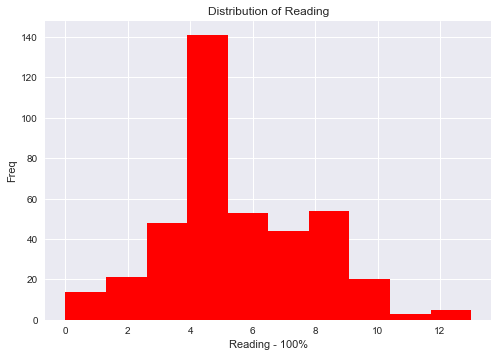

In [9]:
import matplotlib.pyplot as plt
# Univariate  - Histogram, PieChart, Box Plot
x, y  = plt.subplots()
y.hist(subset1['SleepTime'], color = 'red')
y.set_title('Distribution of Reading')
y.set_xlabel('Reading - 100%')
y.set_ylabel('Freq')
plt.show()


In [21]:
#  6th Nov 2020
import pandas
students = pandas.read_csv("https://modcom.co.ke/data2020/datasets/school.csv")
students

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,...,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783,3/22/1995,NaN,NaN,NaN,NaN,0.0,0,72.35,NaN,...,88.24,81.50,60.02,81.44,In state,1.0,NaN,NaN,7.0,1.0
1,20278,1/1/1995,NaN,NaN,NaN,Philosophy,0.0,0,70.66,179.20,...,89.45,85.25,70.19,73.27,NaN,1.0,NaN,NaN,5.0,2.0
2,20389,12/31/1994,NaN,NaN,NaN,NaN,0.0,0,70.68,198.52,...,96.73,86.88,71.20,84.24,In state,NaN,NaN,NaN,8.0,7.0
3,22820,12/1/1994,NaN,NaN,NaN,business administration,1.0,0,NaN,198.34,...,74.06,88.68,55.89,73.16,In state,1.0,NaN,NaN,2.0,6.0
4,24559,11/10/1994,NaN,NaN,NaN,NaN,1.0,1,67.43,128.17,...,82.61,77.30,65.52,80.45,Out of state,1.0,NaN,NaN,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,34021,7/18/1987,1-Aug-2011,08-May-2017,4.0,accounting,1.0,0,NaN,NaN,...,87.72,84.99,65.31,NaN,In state,0.0,1.0,18.0,1.0,10.0
431,40697,4/29/1987,1-Aug-2011,09-May-2016,4.0,NaN,0.0,0,68.50,131.92,...,91.01,86.87,70.25,82.67,In state,0.0,3.0,26.0,6.0,15.0
432,34272,NaN,1-Aug-2011,09-May-2016,4.0,nursing,0.0,1,68.10,130.07,...,81.05,85.76,58.16,81.87,NaN,0.0,3.0,29.0,6.0,10.0
433,33628,NaN,1-Aug-2011,08-May-2017,4.0,Nursing,1.0,1,69.27,157.26,...,75.59,85.97,66.84,79.35,In state,0.0,1.0,14.0,4.0,10.0


In [22]:
print(students.isnull().sum())

NameError: name 'students' is not defined

In [16]:
# fill empties
students['Gender'].fillna(2, inplace=True)  # 2 means unknown
# convert from 0,1s to String/decode them
students['Gender'].replace({0:'Male', 1:'Female',2:'Unknown'}, inplace=True)

# decode athlete
students['Athlete'].replace({0:'Non Athlete', 1:'Athlete'}, inplace=True)

# Decode rank
# fill empties
students['Rank'].fillna(0, inplace=True)  # 0 means unknown
students['Rank'].replace({0:'Unknown', 1:'Freshman',2:'Sophomore',3:'Junior',4:'Senior'}, inplace=True)


students['Major'].fillna('Unknown', inplace=True)  # 0 means unknown

# That how fill empties and decode categorical, 
# fill empties for continous variables like math
median_math = students['Math'].median()
students['Math'].fillna(median_math, inplace=True)

students

NameError: name 'students' is not defined

In [20]:
# graphs
import matplotlib.pyplot as plt
#plt.style.available
plt.style.use('seaborn')

NameError: name 'students' is not defined

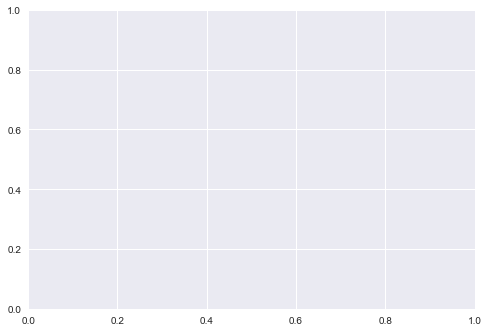

In [19]:
# histogram   - univariate
x, y = plt.subplots()
y.hist(students['Reading'], color = 'pink')
y.set_title('Reading Distribution')
y.set_xlabel('Reading -100%')
y.set_ylabel('Freq.')
plt.show()


  
# density  - univariate
x, y = plt.subplots()
y.plot(students['Reading'], color = 'pink')
y.set_title('Reading Distribution')
y.set_xlabel('Freq')
y.set_ylabel('Reading -100%.')
plt.show()



# scatter   -  bivariate
x, y = plt.subplots()
y.scatter(students['Reading'],students['Math'], color = 'pink')
y.set_title('Reading vs Math')
y.set_xlabel('Reading -100%')
y.set_ylabel('Maths - 100%')
plt.show()


# pie   -  univariate
x, y = plt.subplots()
students.groupby('Rank').size().plot(kind='pie', autopct='%3.3f%%')
y.set_title('Rank Class Sizes')
y.set_xlabel('')
y.set_ylabel('')
plt.show()


# bar   -  univariate
x, y = plt.subplots()
students.groupby('Athlete')['Math'].mean().plot(kind='bar')
y.set_title('Avg Math Score by Athlete')
y.set_xlabel('Athlete')
y.set_ylabel('Math')
plt.show()


# bar   -  univariate
x, y = plt.subplots()
students.groupby(['Athlete','Rank'])['Math'].mean().unstack().plot(kind='bar',stacked  =True)
y.set_title('Avg Math Score by Athlete and Rank')
y.set_xlabel('Athlete')
y.set_ylabel('Math')
plt.show()


# inferential


